import section

In [1]:
import pandas as pd
from pandas import DataFrame
import ast
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load the sales data
sales_df = pd.read_csv('data/sale.csv', sep=',')

# Load the menu data
menu_df = pd.read_csv('data/menus.csv', sep=',')

# Load the add-on data
add_on_df = pd.read_csv('data/add-on.csv', sep=',')

# Check basic info of each dataframe
menu_df.info(), sales_df.info(), add_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         48 non-null     object 
 1   name         48 non-null     object 
 2   category     48 non-null     object 
 3   price        48 non-null     float64
 4   description  48 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uuid       108000 non-null  object
 1   date_time  108000 non-null  object
 2   menu_item  108000 non-null  object
 3   add_ons    108000 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----------

(None, None, None)

Additional function

In [3]:
# Function to calculate the total price of add-ons
def calculate_addon_price(addons, addons_df: DataFrame) -> float:
    addons_list = ast.literal_eval(addons)  # Convert the string representation of list to actual list
    total_price = 0
    for addon in addons_list:
        price = addons_df.loc[addons_df['name'] == addon, 'price']
        if not price.empty:
            total_price += price.values[0]
    return total_price

Preparation section

In [4]:
# Preprocess menu_df
menu_df['price'] = menu_df['price'].astype(float)  # Ensure price is of type float
menu_df = menu_df.drop(columns=['uuid', 'description'])  # Drop unnecessary columns
menu_df = menu_df.rename(columns={'name': 'menu_name'})  # Rename column for consistency
menu_df = menu_df.dropna(axis=0, how='any')  # Drop rows with any NaN values
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   menu_name  48 non-null     object 
 1   category   48 non-null     object 
 2   price      48 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [5]:
# Preprocess sales_df
sales_df = sales_df.drop(columns=['uuid'])  # Drop unnecessary columns
sales_df = sales_df.rename(columns={'menu_item': 'menu_name'})  # Rename column for consistency
sales_df = sales_df.sort_values('date_time', ascending=True).reset_index(drop=True)  # Sort by date_time and reset index
sales_df = sales_df.dropna(axis=0, how='any')  # Drop rows with any NaN values
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date_time  108000 non-null  object
 1   menu_name  108000 non-null  object
 2   add_ons    108000 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


In [6]:
# Preprocess add_on_df
add_on_df = add_on_df.drop(columns=['uuid'])  # Drop unnecessary columns
add_on_df = add_on_df.dropna(axis=0, how='any')  # Drop rows with any NaN values
add_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   menu    46 non-null     object 
 1   name    46 non-null     object 
 2   price   46 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [7]:
# Merge dataframes
merged_df = pd.merge(menu_df, sales_df, on='menu_name', how='inner')  # Merge menu and sales data on menu_name
merged_df = merged_df.dropna(axis=0, how='any')  # Drop rows with any NaN values
merged_df["date_time"] = pd.to_datetime(merged_df["date_time"])  # Convert date_time to datetime format
merged_df = merged_df.sort_values(by='date_time', ascending=True).reset_index(
    drop=True)  # Sort by date_time and reset index
merged_df["date"] = merged_df["date_time"].dt.strftime("%Y-%m-%d")  # Extract date
merged_df["time"] = merged_df["date_time"].dt.strftime("%H:%M")  # Extract time
merged_df = merged_df.drop(columns=["date_time"])  # Drop the original date_time column
merged_df["add_ons_price"] = merged_df["add_ons"].apply(
    lambda x: calculate_addon_price(x, add_on_df))  # Calculate add_ons_price
merged_df["total_price"] = merged_df["add_ons_price"] + merged_df["price"]  # Calculate total price
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   menu_name      108000 non-null  object 
 1   category       108000 non-null  object 
 2   price          108000 non-null  float64
 3   add_ons        108000 non-null  object 
 4   date           108000 non-null  object 
 5   time           108000 non-null  object 
 6   add_ons_price  108000 non-null  float64
 7   total_price    108000 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.6+ MB


In [8]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print(missing_values)

menu_name        0
category         0
price            0
add_ons          0
date             0
time             0
add_ons_price    0
total_price      0
dtype: int64


In [9]:
# Display the first few rows of the final merged dataframe
merged_df.head()

,menu_name,category,price,add_ons,date,time,add_ons_price,total_price
0,Ham & cheese,Toasties On Sourdough,7.0,[],2021-07-13,07:05,0.0,7.0
1,"Chicken, beef & pork or vegan sausage roll",House Made Pastries,7.0,[],2021-07-13,07:06,0.0,7.0
2,Hot Chocolate,Beverage,4.0,[],2021-07-13,07:07,0.0,4.0
3,Mocha,Beverage,5.0,[],2021-07-13,07:08,0.0,5.0
4,CHILLI SCRAMBLE,All day breakfast,18.0,[],2021-07-13,07:08,0.0,18.0


**Analysis section**

---

In [10]:
# Analyze merged_df for negative prices
negative_price = merged_df[merged_df['price'] < 0]
negative_add_ons_price = merged_df[merged_df['add_ons_price'] < 0]
negative_total_price = merged_df[merged_df['total_price'] < 0]

# Display dataframes with negative values
print(negative_price)
print(negative_add_ons_price)
print(negative_total_price)

Empty DataFrame
Columns: [menu_name, category, price, add_ons, date, time, add_ons_price, total_price]
Index: []
Empty DataFrame
Columns: [menu_name, category, price, add_ons, date, time, add_ons_price, total_price]
Index: []
Empty DataFrame
Columns: [menu_name, category, price, add_ons, date, time, add_ons_price, total_price]
Index: []


In [11]:
# Display first few rows and summary statistics of add_on_df
add_on_df.head()

,menu,name,price
0,Sparkling Water,Ice,0.0
1,Sparkling Water,Lemon Slice,0.5
2,Sparkling Water,Lime Slice,0.5
3,Cola,Ice,0.0
4,Cola,Lemon Slice,0.5


In [12]:
add_on_df.describe()

,price
count,46.000000
mean,1.380435
std,1.539065
min,0.000000
25%,0.500000
50%,0.500000
75%,2.500000
max,4.500000


In [13]:
# Count occurrences of each menu in add_on_df
menu_counts = add_on_df['menu']
menu_counts.value_counts()

menu
EGGS ON TOAST                  6
Hot Chocolate                  4
Mocha                          4
AVOCADO TOAST                  4
Cappuccino                     4
Latte                          4
Flat White                     4
Sparkling Water                3
NEW YORK BAGEL BENEDICT        3
Lemonade                       2
Cola                           2
BURRITO BOWL                   1
Long Black                     1
Espresso                       1
Orange Juice                   1
Apple Juice                    1
HUEVOS (SPANISH BAKED EGGS)    1
Name: count, dtype: int64

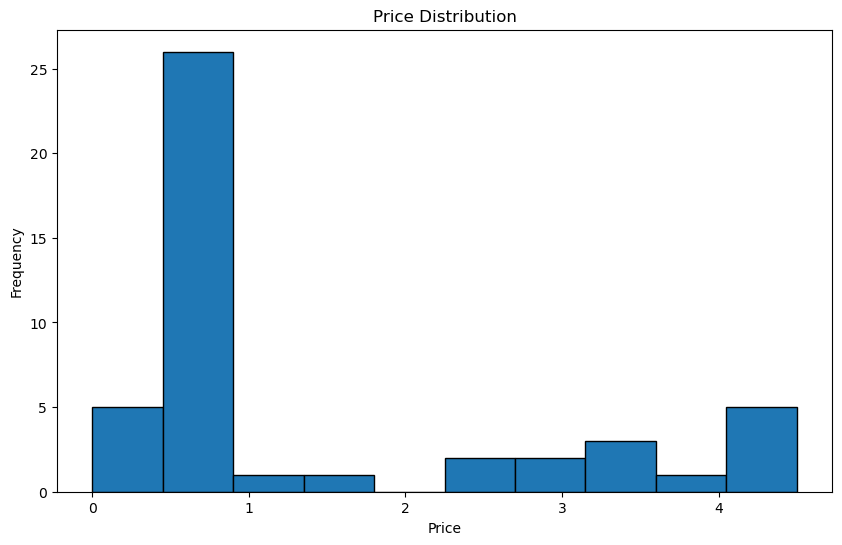

In [14]:
# Plot the distribution of add-on prices
plt.figure(figsize=(10, 6))
plt.hist(add_on_df['price'], bins=10, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

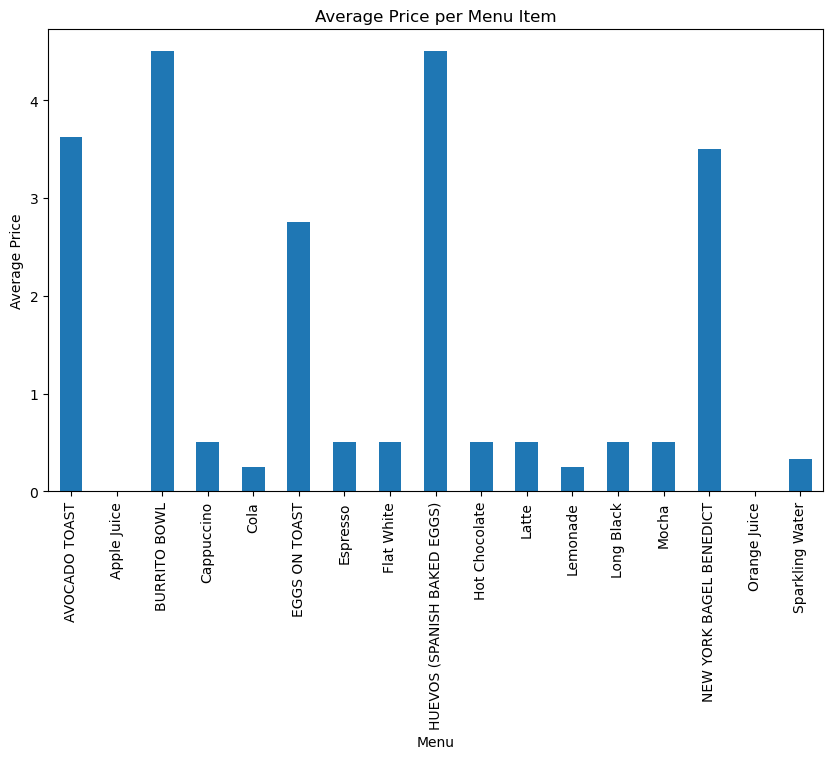

In [15]:
# Calculate and plot average price per menu item in add_on_df
average_price_per_menu = add_on_df.groupby('menu')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_per_menu.plot(kind='bar')
plt.title('Average Price per Menu Item')
plt.xlabel('Menu')
plt.ylabel('Average Price')
plt.show()

In [16]:
# Add day of the week to merged_df
merged_df['date'] = pd.to_datetime(merged_df['date'])  # Ensure 'date' is in datetime format
merged_df['day_of_week'] = merged_df['date'].dt.day_name()  # Extract day of the week

In [17]:
merged_df.head()

,menu_name,category,price,add_ons,date,time,add_ons_price,total_price,day_of_week
0,Ham & cheese,Toasties On Sourdough,7.0,[],2021-07-13,07:05,0.0,7.0,Tuesday
1,"Chicken, beef & pork or vegan sausage roll",House Made Pastries,7.0,[],2021-07-13,07:06,0.0,7.0,Tuesday
2,Hot Chocolate,Beverage,4.0,[],2021-07-13,07:07,0.0,4.0,Tuesday
3,Mocha,Beverage,5.0,[],2021-07-13,07:08,0.0,5.0,Tuesday
4,CHILLI SCRAMBLE,All day breakfast,18.0,[],2021-07-13,07:08,0.0,18.0,Tuesday


In [18]:
merged_df.describe()

,price,date,add_ons_price,total_price
count,108000.000000,108000,108000.000000,108000.000000
mean,9.014264,2023-01-01 22:41:23.999999744,0.177944,9.192208
min,3.000000,2021-07-13 00:00:00,0.000000,3.000000
25%,4.500000,2022-04-06 00:00:00,0.000000,4.500000
50%,7.000000,2022-12-31 00:00:00,0.000000,7.000000
75%,12.000000,2023-09-29 00:00:00,0.000000,13.000000
max,21.000000,2024-06-26 00:00:00,16.500000,30.500000
std,5.674114,NaN,1.066851,5.825301


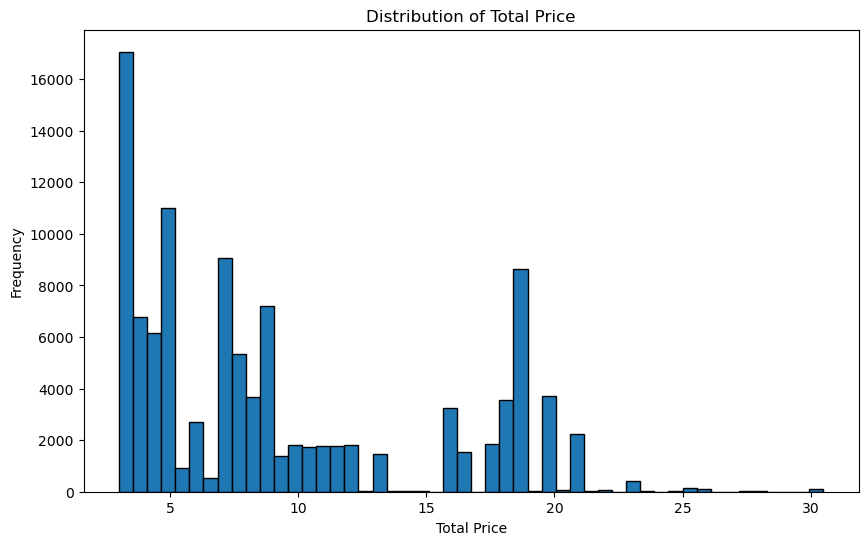

In [19]:
# Plot the distribution of total prices in merged_df
plt.figure(figsize=(10, 6))
plt.hist(merged_df['total_price'], bins=50, edgecolor='black')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.show()

In [20]:
# Perform ANOVA to test for significant differences in total_price between categories
categories = merged_df['category'].unique()
data = [merged_df[merged_df['category'] == category]['total_price'] for category in categories]
f_val, p_val = stats.f_oneway(*data)
print(f'ANOVA results: F-value = {f_val}, P-value = {p_val}')

ANOVA results: F-value = 59898.72062553933, P-value = 0.0


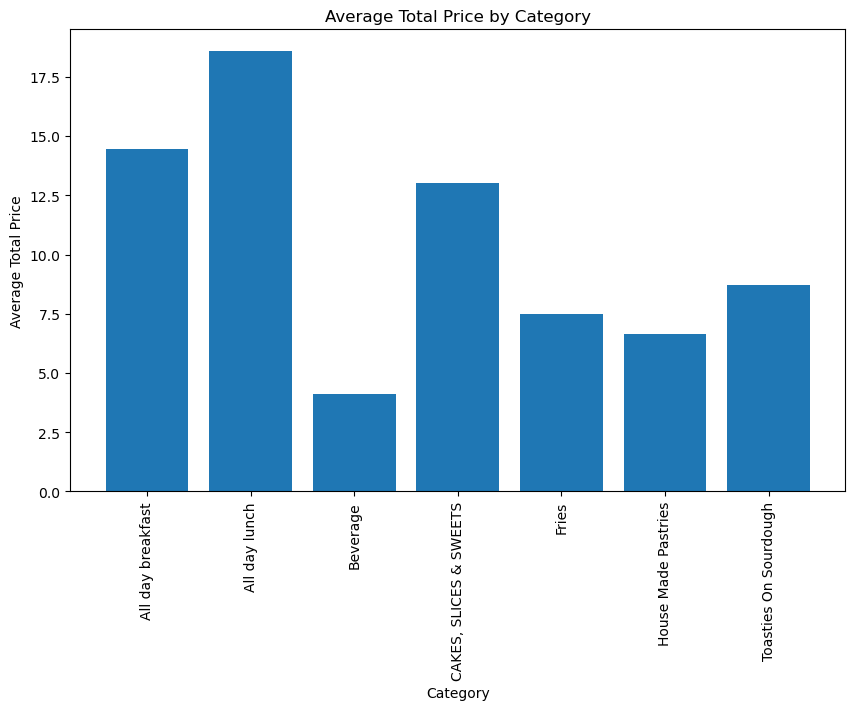

In [21]:
# Calculate and plot average total price by category
avg_price_by_category = merged_df.groupby('category')['total_price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_category.index, avg_price_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Total Price')
plt.title('Average Total Price by Category')
plt.xticks(rotation=90)
plt.show()